In [2]:
from scipy.optimize import curve_fit

[ 1.08348182e+00 -2.12175517e+03]


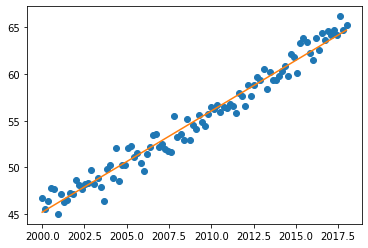

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # pour que le générateur "aléatoire" soit 
                  # le même pour tout le monde
N = 100
x = np.linspace(2000, 2018, N)
y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)

plt.plot(x, y, 'o');

def f(x, a, b):
    return a*x + b

popt, pcov = curve_fit(f, x, y)
print(popt)

plt.plot(x, f(x, popt[0], popt[1]))


array([ 1.08348182e+00, -2.12175517e+03])

In [5]:
pcov

array([[ 3.73523915e-04, -7.50409536e-01],
       [-7.50409536e-01,  1.50758303e+03]])

In [11]:
pcov[0, 1]/np.sqrt(pcov[0, 0]*pcov[1, 1])

-0.999996587616246

In [42]:
sigma_b = np.sqrt(pcov[1, 1])
sigma_a = np.sqrt(pcov[0, 0])
print(sigma_a)
print(sigma_b)


0.019749191412580896
39.67626120659922


In [15]:
f(2020, *popt)

66.87810806440802

In [18]:
# Ce qu'il ne faut pas faire 
x_e = 2010
sigma_x = np.sqrt(sigma_a**2 * x_e**2 + sigma_b**2)
sigma_x

54.92410215981484

In [21]:
# Ce qu'il faut faire 
x_e = 2010
sigma_x = np.sqrt(sigma_a**2 * x_e**2 + sigma_b**2 + 2*x_e*pcov[0, 1])
sigma_x

0.10325902607003734

In [37]:
M = 100000

res = []
for _ in range(1000):
    y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)

    popt, pcov = curve_fit(f, x, y)
#    print(popt)
    res.append(popt)
res = np.array(res)

In [38]:
res

array([[ 1.09395116e+00, -2.14290185e+03],
       [ 1.10572131e+00, -2.16666747e+03],
       [ 1.08892953e+00, -2.13292432e+03],
       ...,
       [ 1.10292131e+00, -2.16087202e+03],
       [ 1.12578113e+00, -2.20673719e+03],
       [ 1.11218413e+00, -2.17960053e+03]])

In [39]:
res[:,1].std()

36.71255987019267

In [41]:
res[:,0].std()

0.01827295671787489

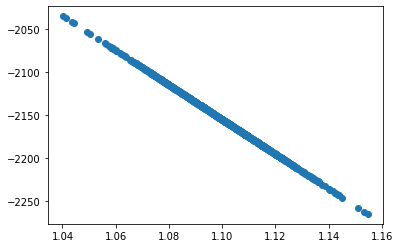

In [44]:
plt.scatter(res[:,0], res[:,1])

In [46]:
np.cov(res[:,0], res[:,1])

array([[ 3.34235182e-04, -6.71516317e-01],
       [-6.71516317e-01,  1.34916121e+03]])

In [49]:
np.mean( (res[:,0] - res[:,0].mean())*(res[:,1] - res[:,1].mean()))

-0.6708448011078576

[ 1.08348184 56.04328986]


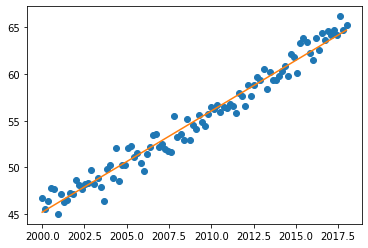

In [50]:
np.random.seed(0) # pour que le générateur "aléatoire" soit 
                  # le même pour tout le monde
N = 100
x = np.linspace(2000, 2018, N)
y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)

plt.plot(x, y, 'o');

def f(x, a, b):
    return a*(x-2010) + b

popt, pcov = curve_fit(f, x, y)
print(popt)

plt.plot(x, f(x, popt[0], popt[1]))


In [51]:
pcov

array([[0.00037352, 0.00037352],
       [0.00037352, 0.01066241]])

In [52]:
pcov[0, 1]/np.sqrt(pcov[0, 0]*pcov[1, 1])

0.18716796679887945

In [53]:
M = 100000

res = []
for _ in range(1000):
    y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)

    popt, pcov = curve_fit(f, x, y)
#    print(popt)
    res.append(popt)
res = np.array(res)

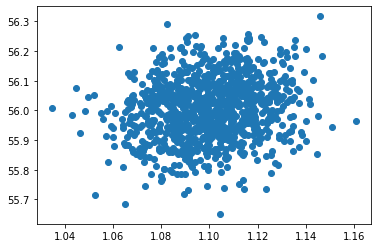

In [54]:
plt.scatter(res[:,0], res[:,1])